## graph

In [2]:
import pandas as pd
import sqlite3

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [4]:
commit = pd.io.sql.read_sql("select cast(strftime('%H', timestamp) as int) as hour, strftime('%Y-%m-%d', timestamp) as date from checker where uid LIKE 'user_%'", con=connect)

In [6]:
commit['daytime'] = pd.cut(commit['hour'], bins=[0, 4, 10, 17, 24], right=False, include_lowest=True, labels=['night', 'morning', 'afternoon', 'evening'])

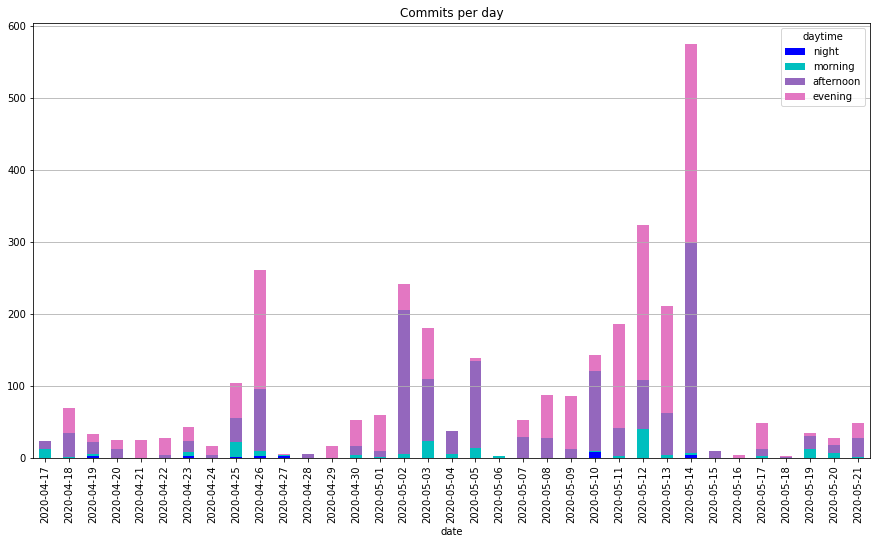

In [14]:
df = pd.pivot_table(commit, index='date', columns='daytime', aggfunc='count')['hour']
ax = df.plot.bar(figsize=(15, 8), rot=90, stacked=True, color=['b', 'c', 'tab:purple', 'tab:pink']);
ax.set_title('Commits per day');
ax.yaxis.grid()

## asnwer

2020-05-12